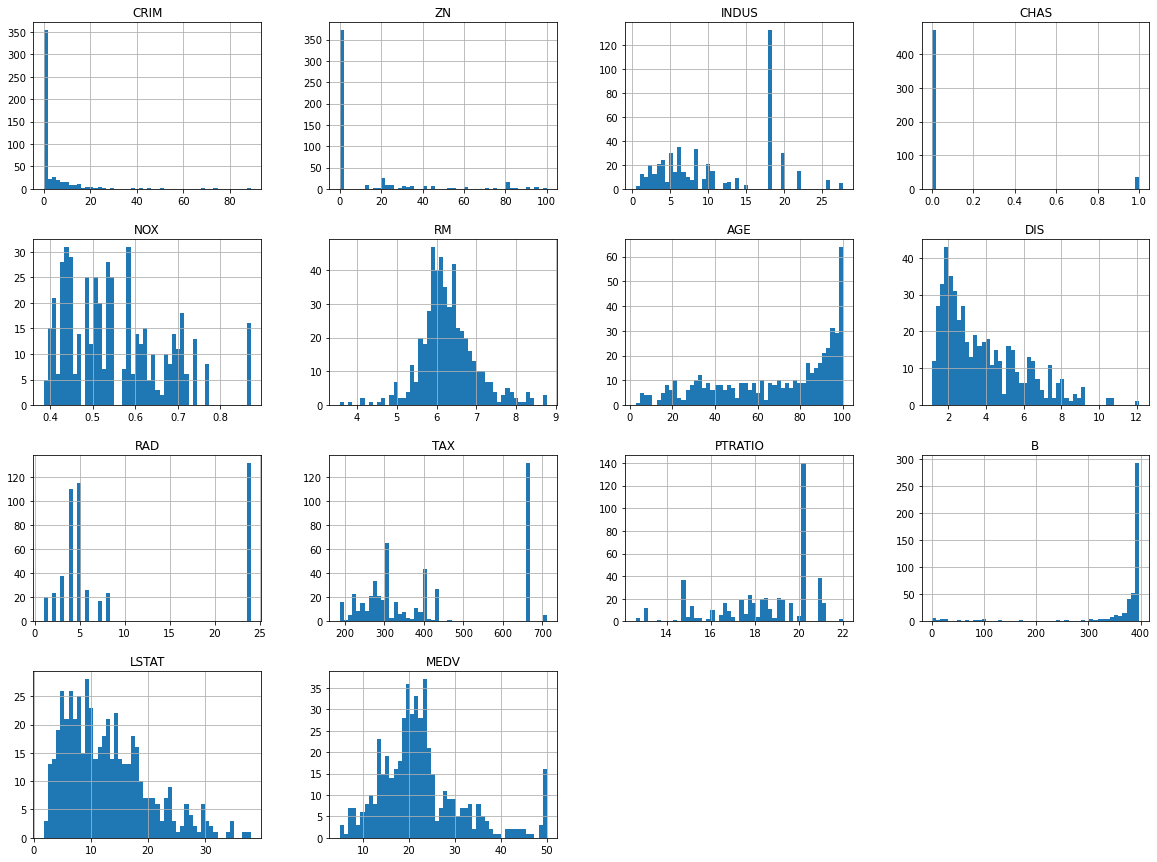

In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

boston_dataset = load_boston()
housing = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
housing['MEDV'] = boston_dataset.target

# 모든 특성에 대한 히스토그램 출력
# bins는 짝대기 개수, figsize는 표 크기
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [2]:
"""
무작위 샘플링
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
"""

'\n무작위 샘플링\nfrom sklearn.model_selection import train_test_split\ntrain_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)\n'

<AxesSubplot:>

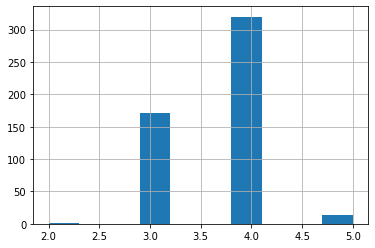

In [3]:
# 계층적 샘플링
import numpy as np

# bins의 숫자들 사이사이 범위에 각각 label의 숫자들을 매겨서 'number_RM'이라는 컬럼값 생성
housing['number_RM'] = pd.cut(housing['RM'], bins=[0, 2, 4, 6, 8, np.inf], labels=[1,2,3,4,5])
housing['number_RM'].hist()

In [4]:
# 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

# 1개의 train/ test set 만을 분할하므로 n_splits=1 로 지정
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['number_RM']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 'number_RM'컬럼은 다시 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop('number_RM', axis=1, inplace=True)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

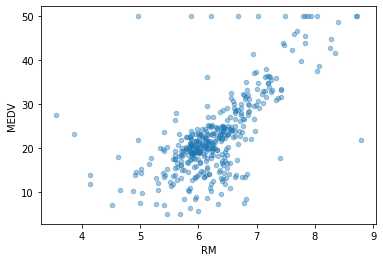

In [9]:
"""데이터 시각화"""

housing = strat_train_set.copy()
# alpha를 이용해 밀집된 영역을 잘 보여줄 수 있음
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.4)

In [14]:
"""데이터 준비"""

housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

# 만약 결측값이 있다면 각 특성의 중간값으로 채워주는 코드
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)

In [20]:
"""모델 훈련과 평가"""

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(housing, housing_labels)

# 샘플에 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
print('예측:', model.predict(some_data))
print('레이블:', list(some_labels))

# 평균제곱근오차
housing_prediction = model.predict(housing)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)
print(rmse)

# k-겹 교차 검증
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, housing, housing_labels.values.ravel(), cv=5)
np.average(accuracy)

예측: [31.82969691 25.12069174 25.29060904 33.00901976 29.57710172]
레이블: [29.1, 21.4, 18.5, 36.4, 22.5]
4.804546667386259


0.686110545364261